In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [3]:
ecom_df = pd.read_csv("ecommerce-data.csv")

In [8]:
ecom_df_PT = ecom_df[(ecom_df['profile'].isin(['Teacher', 'Parent'])) & (ecom_df['productKnewWhatWanted'].isin(['Yes', 'No']))]
cross_tab = pd.crosstab(index=ecom_df_PT['profile'], columns=ecom_df_PT['productKnewWhatWanted'], normalize='index')

print(cross_tab)

productKnewWhatWanted        No       Yes
profile                                  
Parent                 0.392226  0.607774
Teacher                0.441860  0.558140


In [20]:
ecom_df_PT = ecom_df[(ecom_df['profile'].isin(['Teacher', 'Parent']))]
cross_tab = pd.crosstab(index=ecom_df_PT['profile'], columns=ecom_df_PT['productKnewWhatWanted'], normalize='index')

print(cross_tab)

productKnewWhatWanted        No  Somewhat       Yes
profile                                            
Parent                 0.181967  0.536066  0.281967
Teacher                0.226190  0.488095  0.285714


In [25]:
import pandas as pd
from scipy.stats import chisquare

# Assuming your DataFrame is named 'ecom_df_PT'
subset_df = ecom_df_PT[ecom_df_PT['productKnewWhatWanted'] == "Yes"]
profile_counts = subset_df['profile'].value_counts()

# Perform the chi-square test
chi2, p_value = chisquare(profile_counts.to_frame())

print("Chi-square statistic:", str(chi2))
print("p-value:", str(p_value))

Chi-square statistic: [69.89090909]
p-value: [6.26766468e-17]


In [30]:
ecom_df_PTH = ecom_df[ecom_df['profile'].isin(["Teacher", "Parent", "Health Professional"])]

page_view_sum = ecom_df_PTH.groupby('profile')['pageViewInt'].sum().reset_index()

print(page_view_sum)

               profile  pageViewInt
0  Health Professional         1617
1               Parent         5436
2              Teacher         1364


In [41]:
from scipy.stats import binomtest

#parent with 60%
parent_result = binomtest(172, 172+111, 0.6)
print(f"Parent's result with {parent_result.n} trial and {parent_result.k} success:")
print(f'statistic: {parent_result.statistic:.3f}')
print(f'p-value: {parent_result.pvalue:.3f} > 0.05 => 60% is true probability')
print(f'with 95% confidence interval: {parent_result.proportion_ci().low:.3f} - {parent_result.proportion_ci().high:.3f}')
#teacher with 55%
teacher_result = binomtest(48,48+38, 0.55)
print(f"Teacher's result with {teacher_result.n} trial and {teacher_result.k} success:")
print(f'statistic: {teacher_result.statistic:.3f}')
print(f'p-value: {teacher_result.pvalue:.3f} > 0.05 => 55% is true probability')
print(f'with 95% confidence interval: {teacher_result.proportion_ci().low:.3f} - {parent_result.proportion_ci().high:.3f}')


Parent's result with 283 trial and 172 success:
statistic: 0.608
p-value: 0.809 > 0.05 => 60% is true probability
with 95% confidence interval: 0.548 - 0.665
Teacher's result with 86 trial and 48 success:
statistic: 0.558
p-value: 0.914 > 0.05 => 55% is true probability
with 95% confidence interval: 0.447 - 0.665


In [44]:
page_view_mean = ecom_df_PT.groupby('profile')['pageViewInt'].mean().reset_index()
page_view_mean

,profile,pageViewInt
0,Parent,7.005155
1,Teacher,6.116592


In [50]:
from scipy.stats import ttest_1samp 

ttest_result = ttest_1samp(page_view_mean['pageViewInt'],popmean=0.5 )
stat, p = ttest_result
low, high = ttest_result.confidence_interval()
print(f'stat: {stat}\nnp-value: {p}')
print(f'95% confidence interval: {low} - {high}')

stat: 13.641970812413826
np-value: 0.04658294474574379
95% confidence interval: 0.9157434206325847 - 12.206003146793794


In [52]:
from scipy.stats import ttest_ind

# Assuming your DataFrame is named 'ecom_df_PT'
profile_groups = ecom_df_PT.groupby('profile')['pageViewInt']

# Perform the t-test
t_stat, p_value = ttest_ind(profile_groups.get_group('Teacher'), 
                           profile_groups.get_group('Parent'),
                           equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -2.922453283584091
p-value: 0.003692800076435973


In [53]:
from scipy.stats import f_oneway

# Assuming your DataFrame is named 'ecom_df'
profile_groups = ecom_df.groupby('profile')['pageViewInt']

# Perform the one-way ANOVA
f_stat, p_value = f_oneway(*[profile_groups.get_group(group) for group in profile_groups.groups])

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 6.232103390207308
p-value: 3.186496988030408e-07


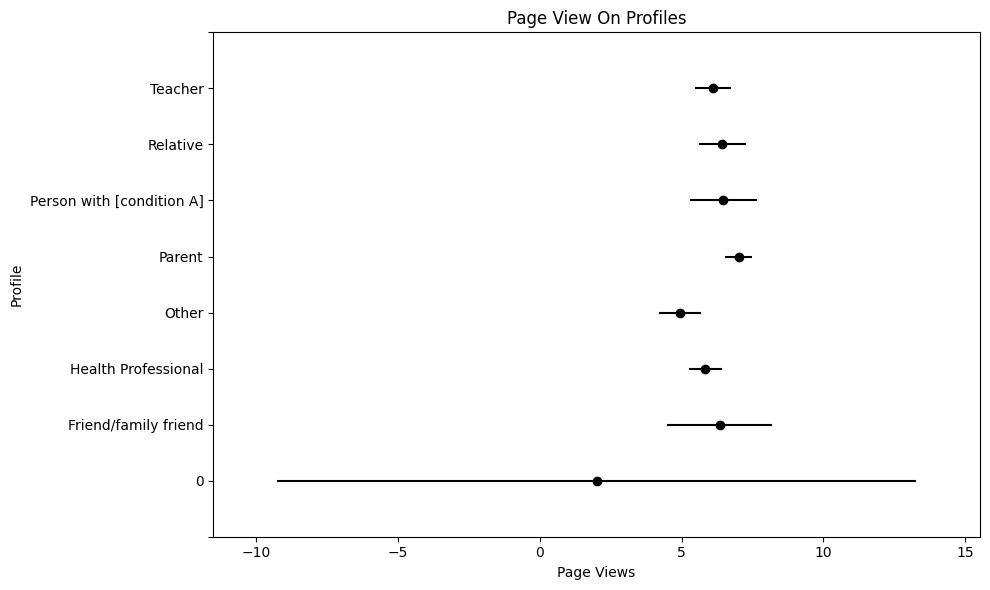

In [58]:
# Assuming your DataFrame is named 'ecom_df'
model = ols('pageViewInt ~ C(profile)', data=ecom_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Perform the multiple comparisons
mc = MultiComparison(ecom_df['pageViewInt'], ecom_df['profile'])
mc_results = mc.tukeyhsd()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
mc_results.plot_simultaneous(ax=ax)
ax.set_xlabel('Page Views')
ax.set_ylabel('Profile')
ax.set_title('Page View On Profiles')
plt.tight_layout()
plt.show()

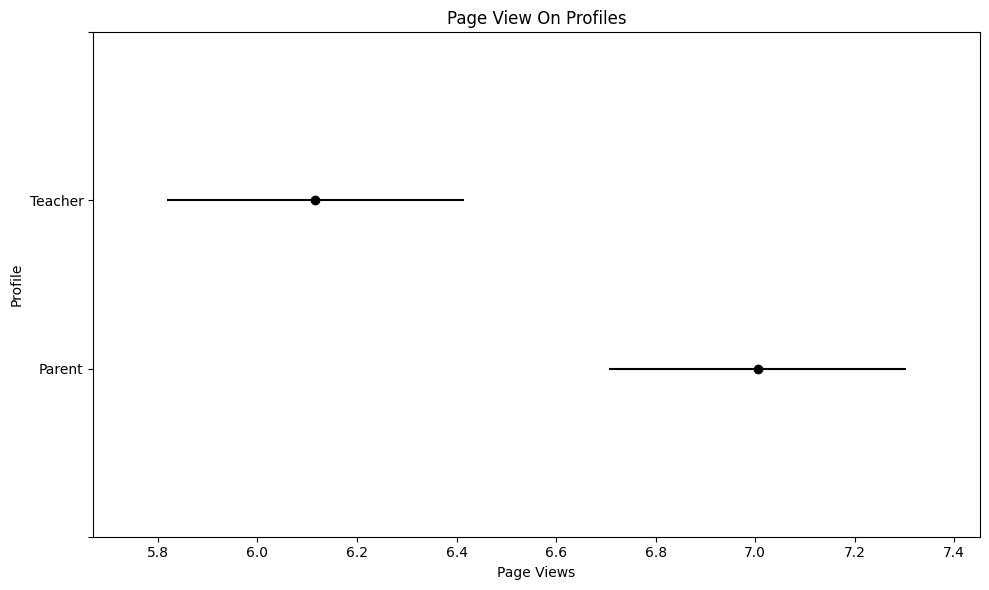

In [57]:
# Assuming your DataFrame is named 'ecom_df_PT'
model = ols('pageViewInt ~ C(profile)', data=ecom_df_PT).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Perform the multiple comparisons
mc = MultiComparison(ecom_df_PT['pageViewInt'], ecom_df_PT['profile'])
mc_results = mc.tukeyhsd()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
mc_results.plot_simultaneous(ax=ax)
ax.set_xlabel('Page Views')
ax.set_ylabel('Profile')
ax.set_title('Page View On Profiles')
plt.tight_layout()
plt.show()